# Importing Libraries

In [2]:
#Import data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns


#preprocess libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE


#Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#configure
%matplotlib inline  

In [4]:
#read the dataset
df=pd.read_csv(r'WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

All total we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

- Hence Binary Classification

In [5]:
#no. of rows and coloumns
df.shape

(1470, 35)

# EDA

In [6]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

- Seems like there are no null values.
- Also, some columns have object datatype which means we have to encode.

In [7]:
#check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

There are no missing values

In [8]:
#check the stats
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

let us drop the unwanted columns like ID

In [9]:
df.columns
df.drop(['EmployeeNumber'],axis = 1,inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [10]:
#check for duplicate data
df.duplicated().sum()

0

No duplicate data found

In [12]:
#check the value count in target column
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data is imbalanced by class we have 1233 people who have not left the company and 237 people who have left the company

# Data Visualization

Analysis -

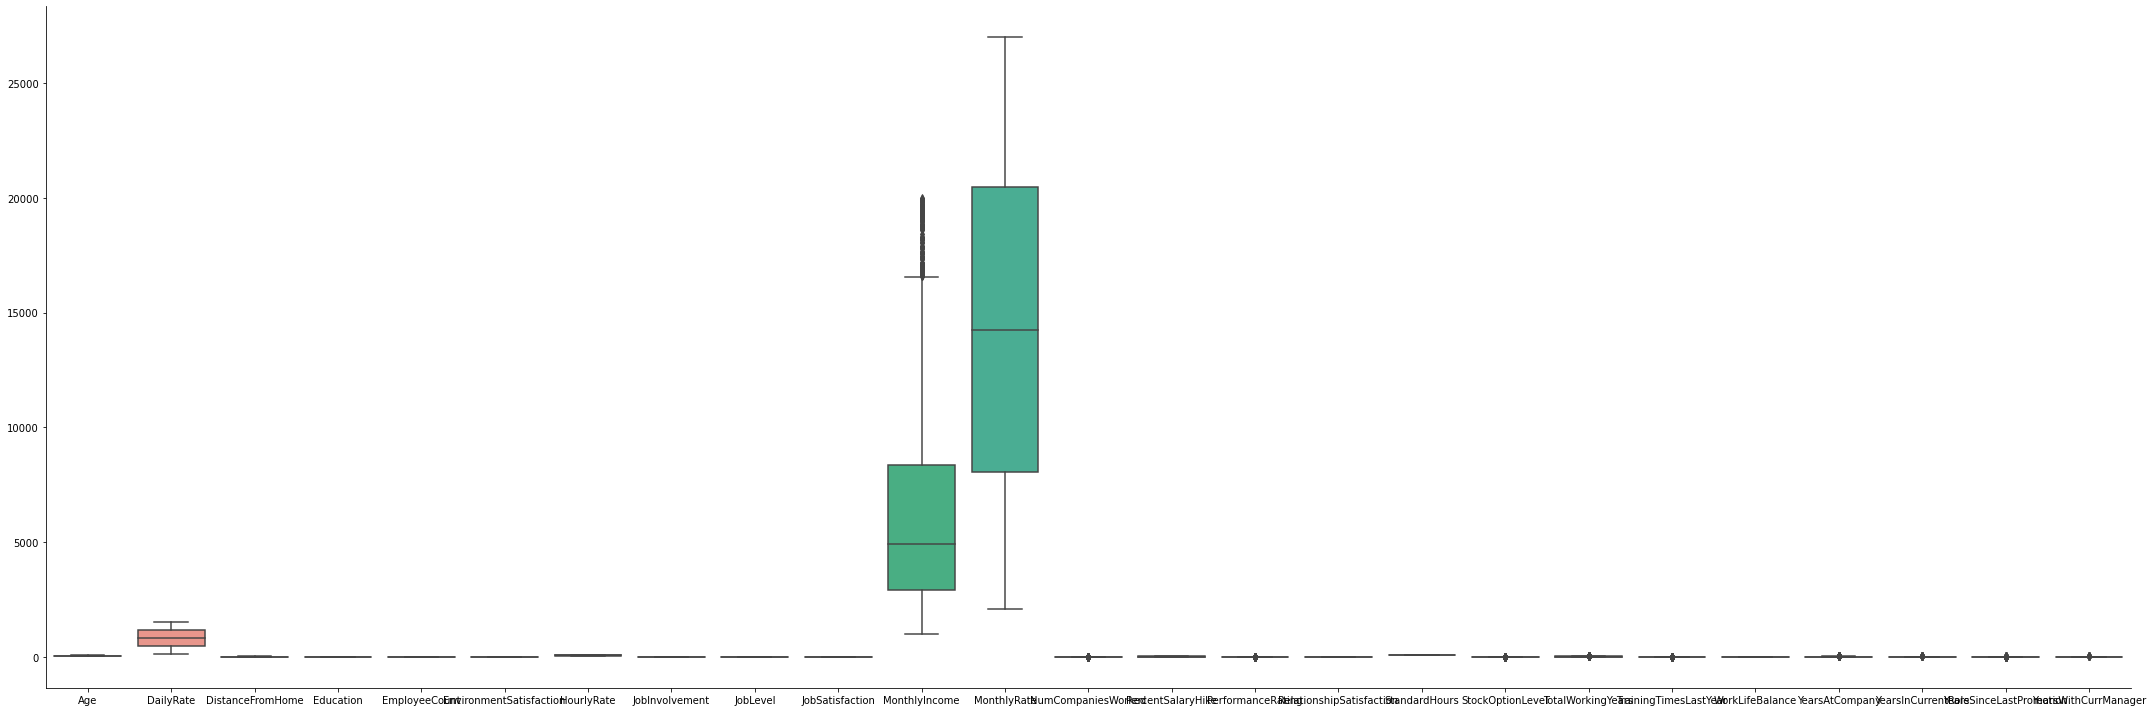

In [13]:
#analyze numeric features

sns.factorplot(data=df,kind='box',size=10,aspect=3)

Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

<AxesSubplot:xlabel='Age', ylabel='Density'>

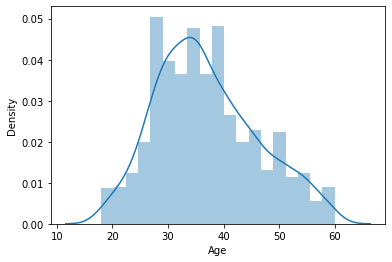

In [14]:
sns.distplot(df['Age'])

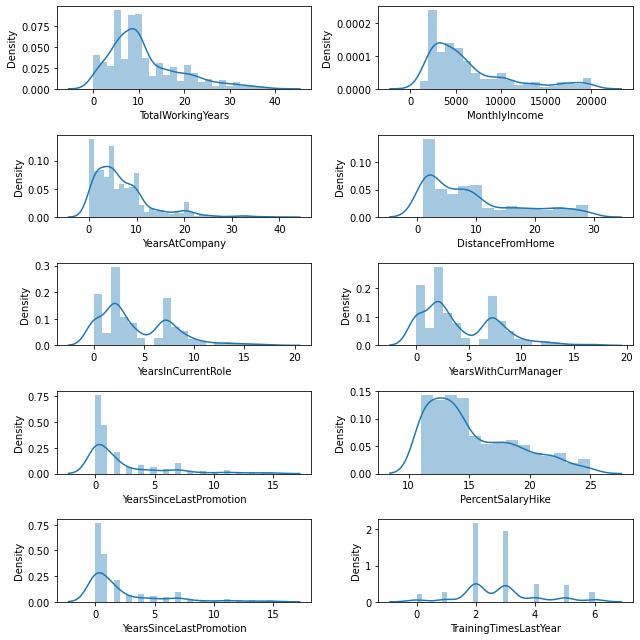

In [15]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

# Univariate Categorical Analysis

In [16]:
#categorical features

cat_df=df.select_dtypes(include='object')

cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [17]:
#function that accepts the name of the column or attribute which we want to analyze.
#The function then plots the countplot for that feature which makes it easier to visualize.

def plot_ca(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

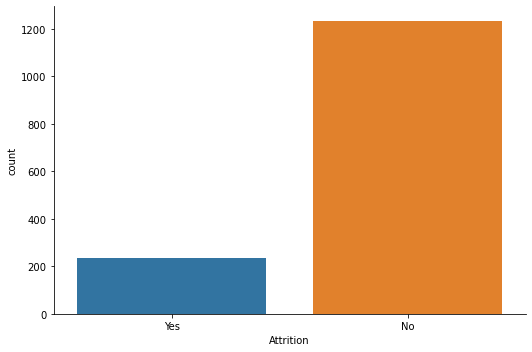

In [18]:
plot_ca('Attrition')

We can observe that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category, hence, target column is skewed and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. We'll do that after the Visualization of other features.

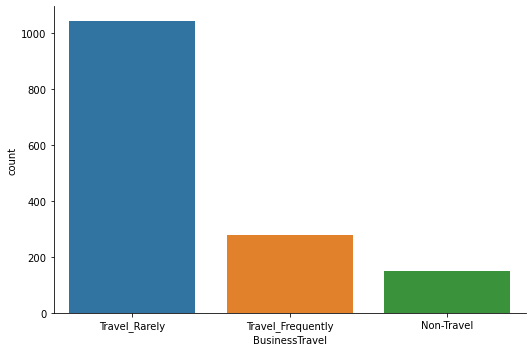

In [19]:
plot_ca('BusinessTravel')

The plot above clearly shows that most people belong to the "Travel_Rarely" class. This indicates that most people did not have jobs that required them to travel frequently.

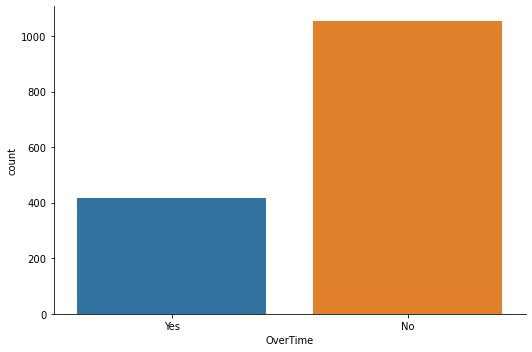

In [20]:
plot_ca('OverTime')

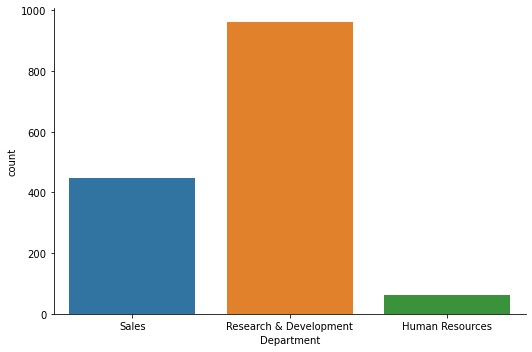

In [21]:
plot_ca('Department')

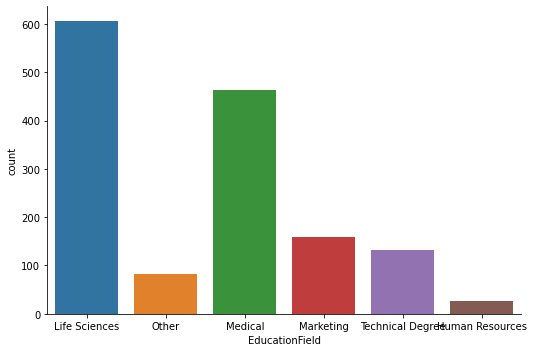

In [22]:
plot_ca('EducationField')

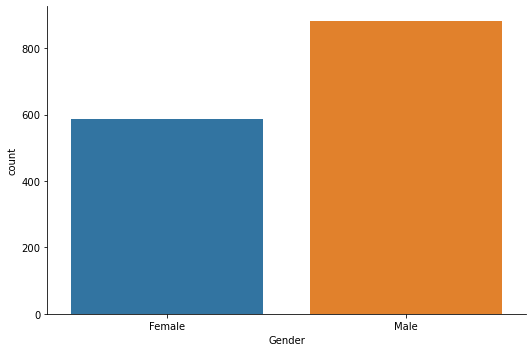

In [23]:
plot_ca('Gender')

We can observe that, males are presnt in higher number.

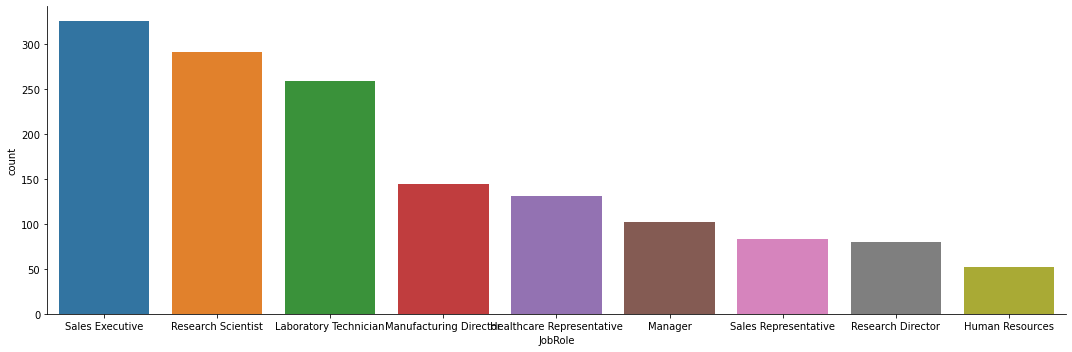

In [24]:
plot_ca('JobRole')

Most of the Employees had "Sales Executive" job role.

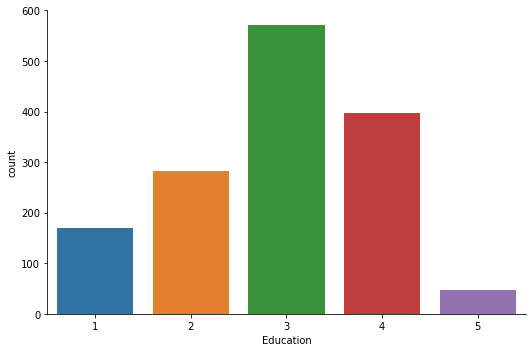

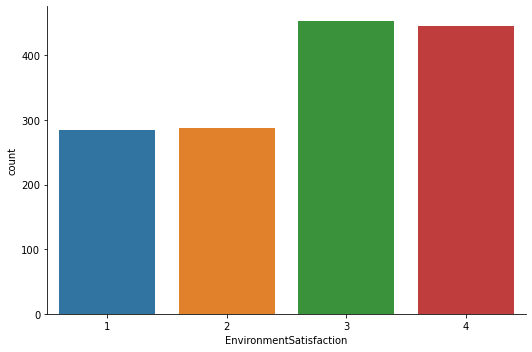

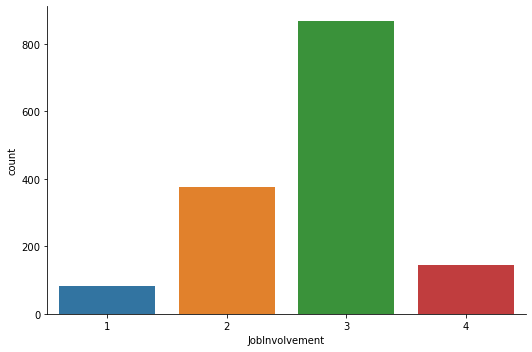

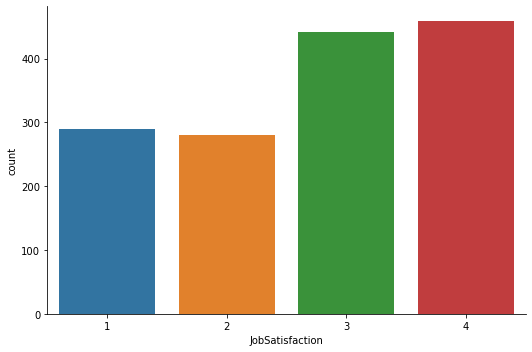

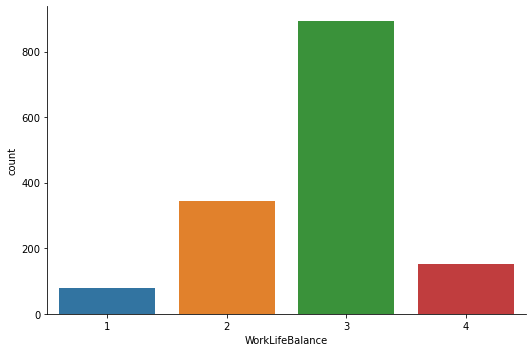

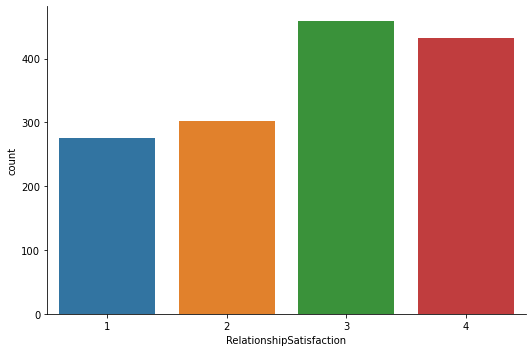

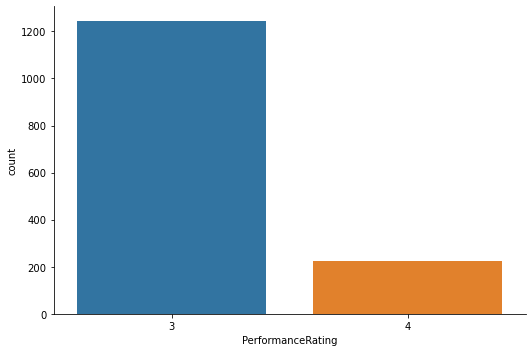

In [25]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_ca(i)

# Correlation

<AxesSubplot:>

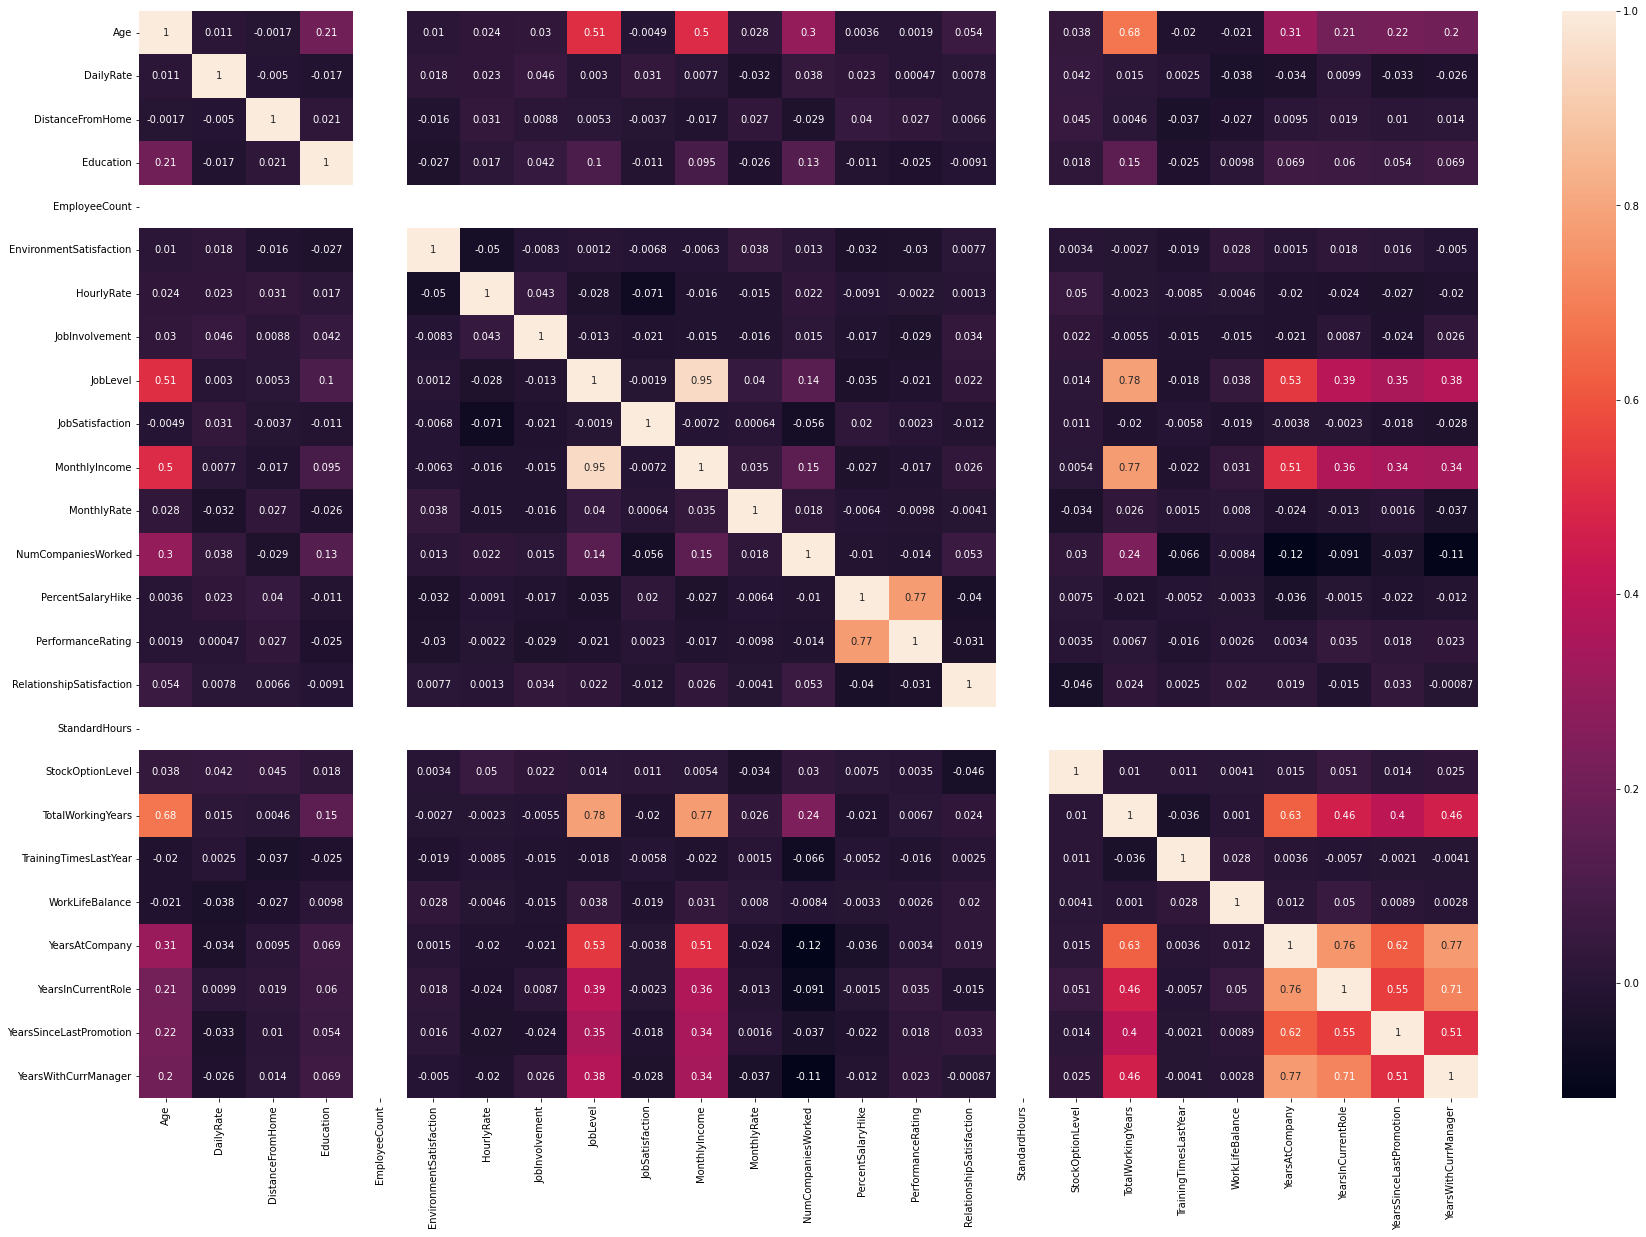

In [26]:
#corelation matrix.
cor_mat= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=cor_mat,annot=True)

Inferences:
1. "JobLevel" is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

2. "MonthlyIncome" is very strongly related to joblevel as expected as senior employees will definately earn more.

3. "PerformanceRating" is highly related to PercentSalaryHike which is quite obvious.

4. Also note that "TotalWorkingYears" is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

5. "YearsWithCurrManager" is highly related to "YearsAtCompany".

6. "YearsAtCompany" is related to "YearsInCurrentRole".

# Plotting the Features against the 'Target' variable.

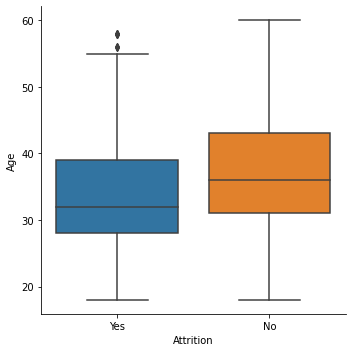

In [27]:
#Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

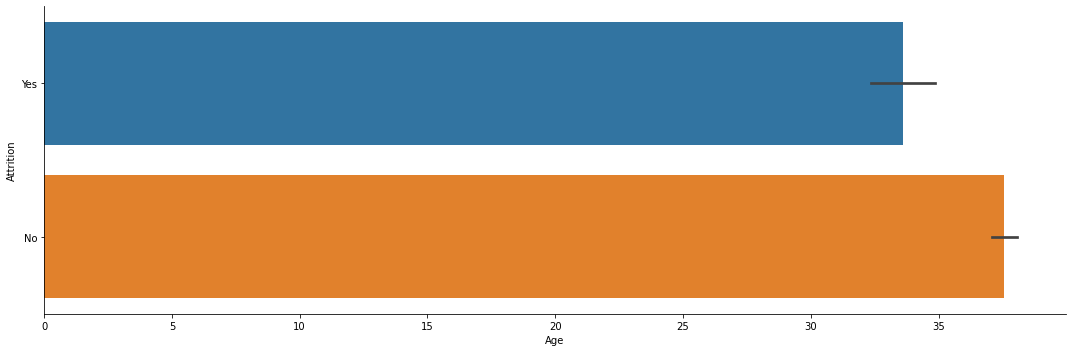

In [28]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

Department

In [29]:
#both Attrition(Target) as well as the Deaprtment are categorical. 
#In such cases a cross-tabulation is the most reasonable way to analyze the trends; which shows clearly the number of observations for each class which makes it easier to analyze the results

df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

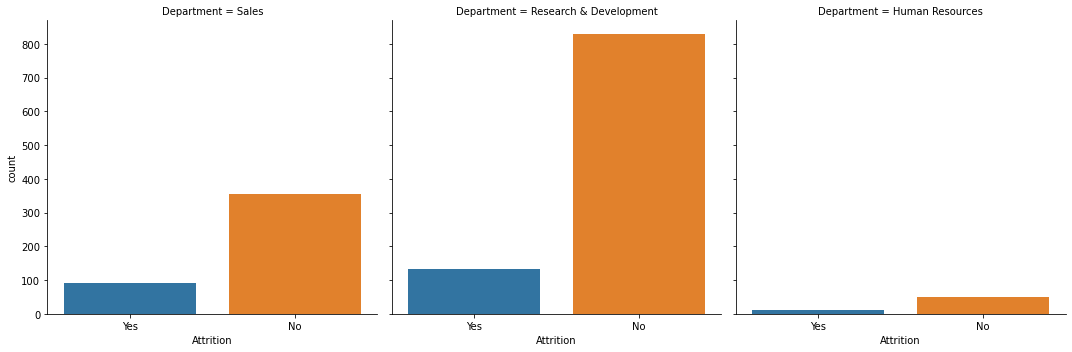

In [30]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [31]:
#set normalize=index to view rowwise %
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index')

Attrition                     No       Yes
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278
All                     0.838776  0.161224

Gender

In [32]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins = True, normalize = 'index')

Attrition        No       Yes
Gender                       
Female     0.852041  0.147959
Male       0.829932  0.170068
All        0.838776  0.161224

All in all 83% of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

Job Level

In [35]:
pd.crosstab(columns = [df.Attrition],index =[df.JobLevel],margins=True,normalize='index')

Attrition        No       Yes
JobLevel                     
1          0.736648  0.263352
2          0.902622  0.097378
3          0.853211  0.146789
4          0.952830  0.047170
5          0.927536  0.072464
All        0.838776  0.161224

People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes', also people in Joblevel 1 has the least tendency to stay.

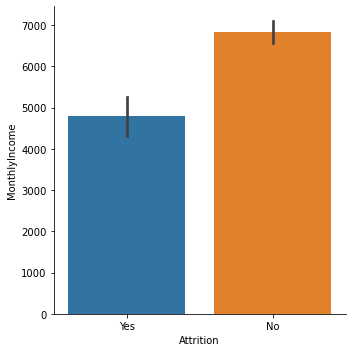

In [36]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

Job Satisfaction

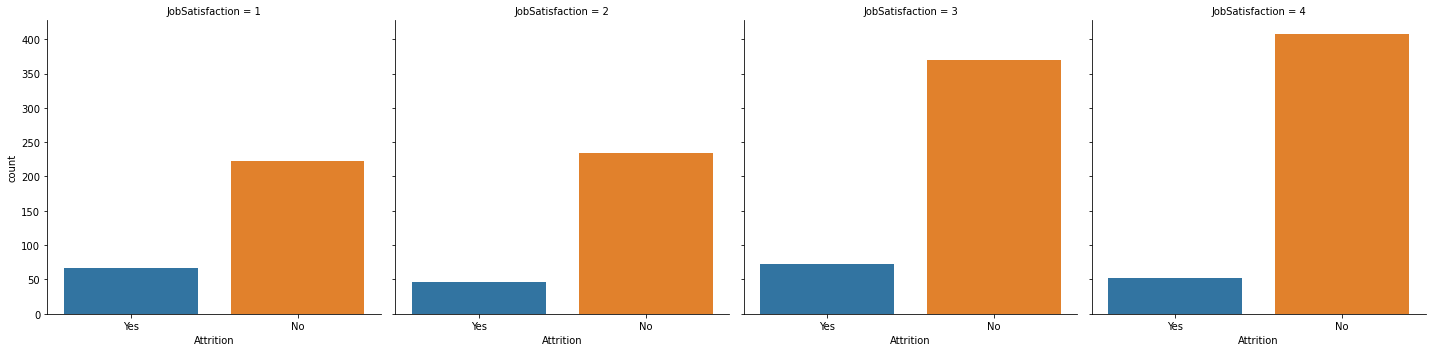

In [37]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [38]:
#set normalize=index to view rowwise %
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index')

Attrition              No       Yes
JobSatisfaction                    
1                0.771626  0.228374
2                0.835714  0.164286
3                0.834842  0.165158
4                0.886710  0.113290
All              0.838776  0.161224

Environment Satisfaction

In [39]:
 # set normalize=index to view rowwise %
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index')

Attrition                      No       Yes
EnvironmentSatisfaction                    
1                        0.746479  0.253521
2                        0.850174  0.149826
3                        0.863135  0.136865
4                        0.865471  0.134529
All                      0.838776  0.161224

We can note that the relative percentage of 'No' in people with a higher degree of environmental satisfaction.

Work Life Balance

In [40]:
#set normalize=index to view rowwise %.
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index')

Attrition              No       Yes
WorkLifeBalance                    
1                0.687500  0.312500
2                0.831395  0.168605
3                0.857783  0.142217
4                0.823529  0.176471
All              0.838776  0.161224

RelationshipSatisfaction

In [41]:
#set normalize=index to view rowwise %
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index')

Attrition                       No       Yes
RelationshipSatisfaction                    
1                         0.793478  0.206522
2                         0.851485  0.148515
3                         0.845316  0.154684
4                         0.851852  0.148148
All                       0.838776  0.161224

# Pre Processing Pipeline

Feature selection

In [42]:
df.drop(['BusinessTravel','DailyRate','EmployeeCount','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

Feature Encoding

In [43]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [44]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [45]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [46]:
df.head()

Age  Attrition  Department  DistanceFromHome  Education  EducationField  \
0   41          1           2                 1          2               1   
1   49          0           1                 8          1               1   
2   37          1           1                 2          2               4   
3   33          0           1                 3          4               1   
4   27          0           1                 2          1               3   

   EnvironmentSatisfaction  Gender  JobInvolvement  JobLevel  ...  OverTime  \
0                        2       0               3         2  ...         1   
1                        3       1               2         2  ...         0   
2                        4       1               2         1  ...         1   
3                        4       0               3         1  ...         1   
4                        1       1               3         1  ...         0   

   PercentSalaryHike  PerformanceRating  RelationshipSatisfaction  \
0                 11                  3                         1   
1                 23                  4                         4   
2                 15                  3                         2   
3                 11                  3                         3   
4                 12                  3                         4   

   TotalWorkingYears  WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  8                1               6                   4   
1                 10                3              10                   7   
2                  7                3               0                   0   
3                  8                3               8                   7   
4                  6                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2  

[5 rows x 24 columns]

Feature Scaling

In [47]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [48]:
#Splitting the data into training and test sets

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Building Machine Learning Model

Handling the Imbalanced dataset

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [63]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

Standard Scaling

In [64]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

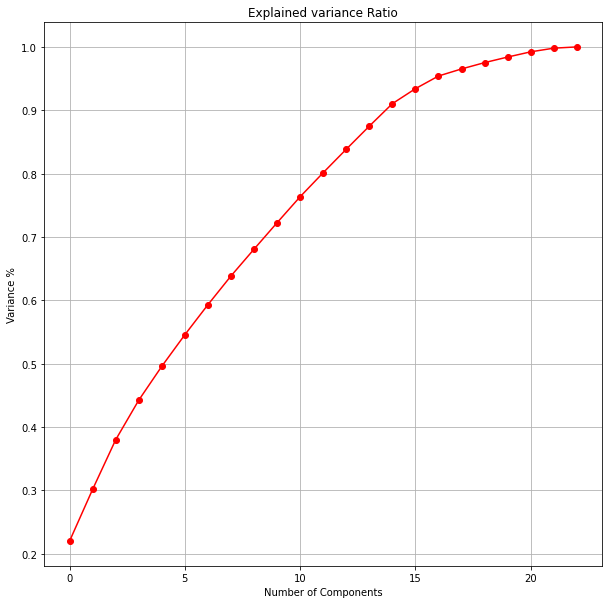

In [65]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

Comment -
AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [66]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [67]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [70]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1652, 21)
Training target vector size: (1652,)
Test feature matrix size: (814, 21)
Test target vector size: (814,)


# Finding best Random state

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8181818181818182 on Random_state 178


In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.742014742014742


Confusion matrix of Logistics Regression : 
 [[274 121]
 [ 89 330]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.75      0.69      0.72       395
           1       0.73      0.79      0.76       419

    accuracy                           0.74       814
   macro avg       0.74      0.74      0.74       814
weighted avg       0.74      0.74      0.74       814



# Finding Optimal value of n_neighbors for KNN

In [73]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34697711796762676
RMSE value for k=  2 is: 0.31349656821103844
RMSE value for k=  3 is: 0.4042161097614287
RMSE value for k=  4 is: 0.3642500963323588
RMSE value for k=  5 is: 0.4147169781793024
RMSE value for k=  6 is: 0.4042161097614287
RMSE value for k=  7 is: 0.4335443321745632
RMSE value for k=  8 is: 0.43070138785901946
RMSE value for k=  9 is: 0.45294558741608815
RMSE value for k=  10 is: 0.4447344126427567
RMSE value for k=  11 is: 0.4623410145760527
RMSE value for k=  12 is: 0.45429968785836333
RMSE value for k=  13 is: 0.47285010689141604
RMSE value for k=  14 is: 0.45564976420130804
RMSE value for k=  15 is: 0.47154927882324493
RMSE value for k=  16 is: 0.45833798672345505
RMSE value for k=  17 is: 0.47544108577638305
RMSE value for k=  18 is: 0.4636676773161086
RMSE value for k=  19 is: 0.48058113878743824
RMSE value for k=  20 is: 0.47414736613812886
RMSE value for k=  21 is: 0.4793012932694108
RMSE value for k=  22 is: 0.48058113878743824
RMSE v

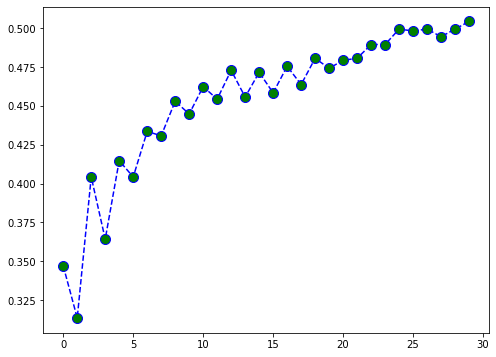

In [74]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

Comment-

At k= 2, we get the minimum RMSE value which approximately 0.30032661958503204, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

Applying other classification algorithm

In [75]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8538083538083538


Confusion matrix : 
 [[330  65]
 [ 54 365]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.84      0.85       395
           1       0.85      0.87      0.86       419

    accuracy                           0.85       814
   macro avg       0.85      0.85      0.85       814
weighted avg       0.85      0.85      0.85       814



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7457002457002457


Confusion matrix : 
 [[281 114]
 [ 93 326]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.75      0.71      0.73       395
           1       0.74      0.78      0.76       419

    accuracy                           0.75       814
   macro avg       0.75      0.74      0.74       814
weighted avg       0.75      0.75      0.75       814




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

In [76]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.77125506 0.79310345 0.79513185 0.75456389 0.79107505]
Mean Score : 0.7810258600159316
Std deviation : 0.015757774870472155




Cross Validation Score SVC() :

Score : [0.87651822 0.92292089 0.90263692 0.87626775 0.88843813]
Mean Score : 0.8933563820614104
Std deviation : 0.01766308531252403




Cross Validation Score GaussianNB() :

Score : [0.65182186 0.69776876 0.65314402 0.67951318 0.67139959]
Mean Score : 0.6707294840315018
Std deviation : 0.017178311142310332




Cross Validation Score DecisionTreeClassifier() :

Score : [0.72469636 0.90060852 0.88843813 0.89046653 0.89858012]
Mean Score : 0.8605579325126673
Std deviation : 0.06808808146209981




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.77327935 0.85395538 0.82758621 0.81947262 0.82352941]
Mean Score : 0.8195645925548776
Std deviation : 0.026096451691545883




Cross Validation Score RandomForestClassifier() :

Score : [0.76315789 0.96957

# Hyper Parameter Tuning : GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [79]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [80]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100}

# Final Model

In [82]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8660933660933661


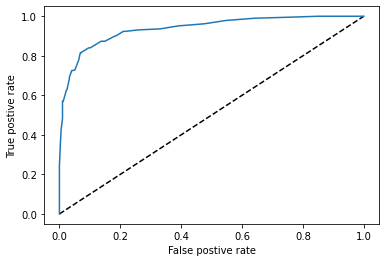

Auc Score :
 0.8658681006616116


In [83]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [84]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']